## Attribute Descriptions

- age: (numeric)

- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- education: (categorical: primary, secondary, tertiary and unknown)

- default: has credit in default? (categorical: 'no','yes','unknown')

- housing: has housing loan? (categorical: 'no','yes','unknown')

- loan: has personal loan? (categorical: 'no','yes','unknown')

- balance: Balance of the individual.

- contact: contact communication type (categorical: 'cellular','telephone')

- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- day: last contact day of the month (numeric: 1,2,3,....29,30)

- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- previous: number of contacts performed before this campaign and for this client (numeric)

- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- deposit - has the client subscribed a term deposit? (binary: 'yes','no')

# 1-Import Libs

In [2]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotx
import seaborn as sns
from plotly.subplots import make_subplots
from collections import Counter
plt.style.use(matplotx.styles.dracula)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

# 2-EDA

In [3]:
df=pd.read_csv('./Data/bank.csv')
print("Data Shape:",df.shape)

Data Shape: (11162, 17)


In [4]:
#checking for duplicated rows and missing values
print("Data Duplicates:",df.duplicated().sum())
print('Data Nulls:',df.isnull().sum().sum())

Data Duplicates: 0
Data Nulls: 0


In [5]:
print(">>> Numerical Data Description\n")
df.describe(exclude = 'O').T

>>> Numerical Data Description



,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [6]:
print(">>> categorical Data Description\n")

df.describe(include = 'O').T

>>> categorical Data Description



,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [23]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


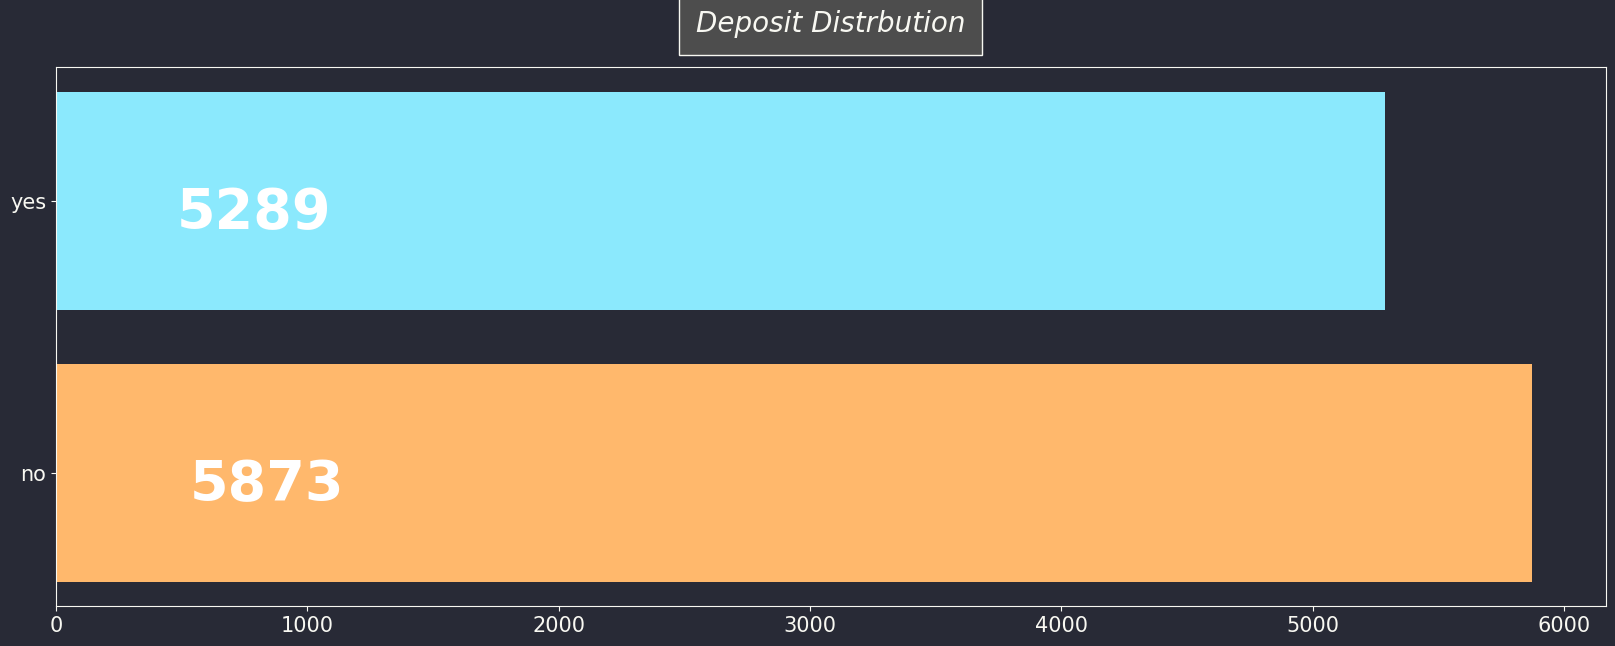

In [419]:
#Target
deposit=pd.DataFrame(df.deposit.value_counts())
plt.figure(figsize = (20,7))
plt.title("Deposit Distrbution",bbox={'facecolor':'0.3', 'pad':12},y=1.05,fontsize=20,fontstyle='italic',loc="center")
plt.barh(y=deposit.index,width=deposit.deposit,color=["#ffb86c","#8be9fd"])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

for i, v in enumerate(deposit.deposit):
    plt.text(v/11, i + -0.1, str(v), color='white', fontweight='bold',fontsize=40)
plt.savefig("Deposit Distrbution.png")

In [335]:
#Time Series
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_month=df.month.value_counts().reset_index().rename(columns = {'month':'values','index':'month'})

In [336]:
df_month2=df_month.set_index("month")
df_month2.index = pd.to_datetime(df_month2.index, format='%b').month

In [337]:
df_month2.sort_index(inplace=True)

In [340]:
df_month2['months']=new_order

In [342]:
df_day=df.day.value_counts().reset_index().rename(columns = {'day':'values','index':'day'}).sort_values(by='day',ascending=True)


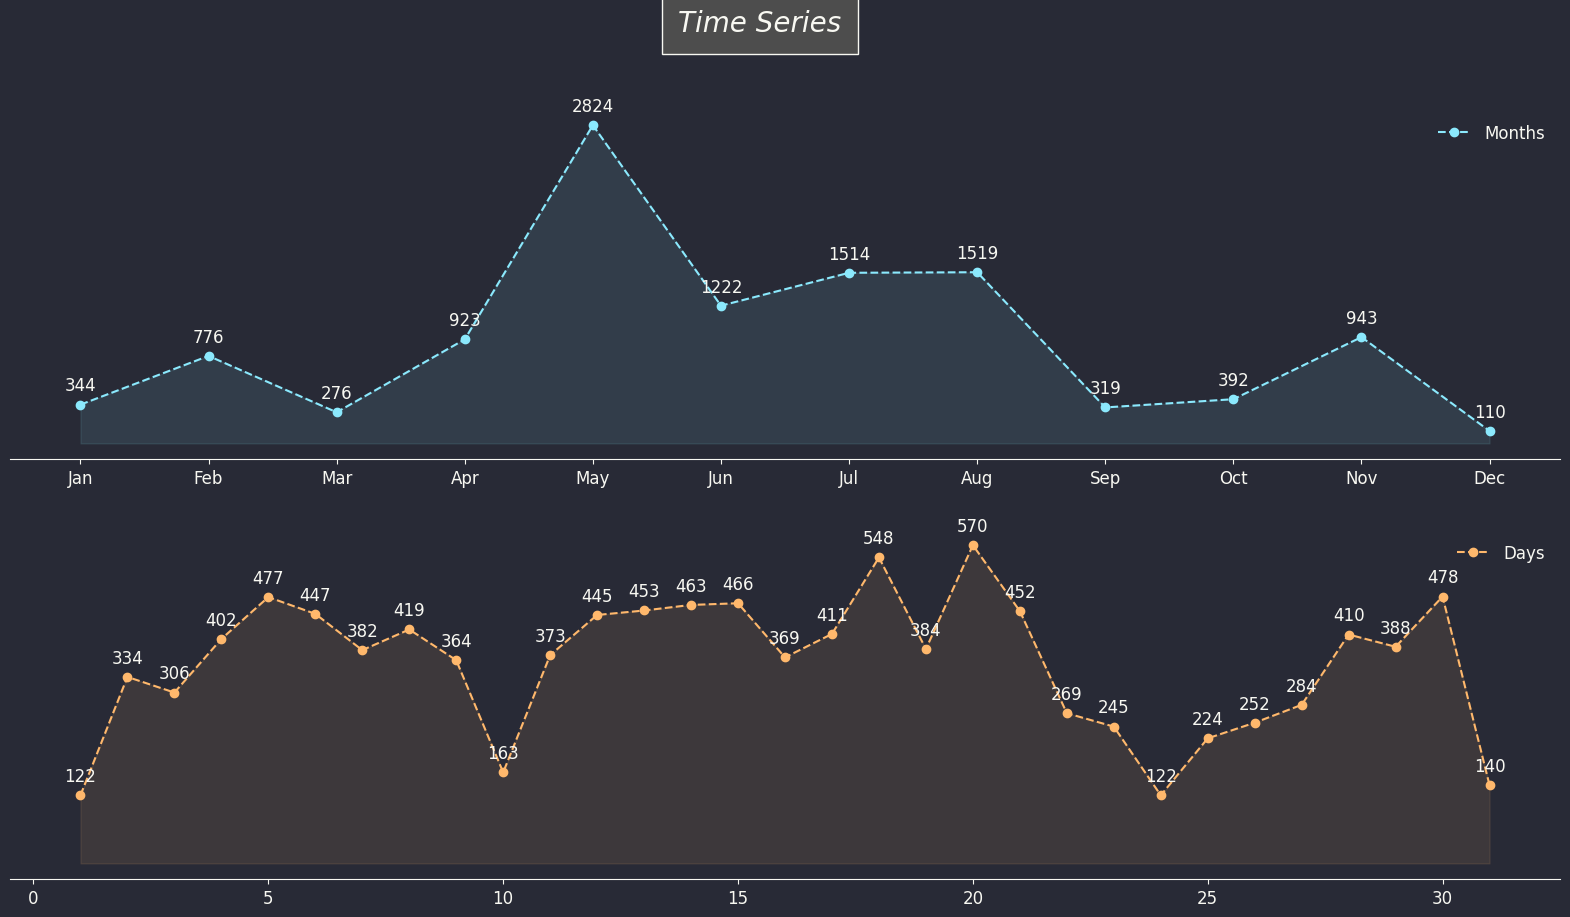

In [402]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(20, 10))
fig.suptitle('Time Series',fontsize = 20,fontstyle='italic',bbox={'facecolor':'0.3', 'pad':12})


ax1.plot(df_month2['months'],df_month2['values'],color='#8be9fd',marker="o",linestyle = 'dashed',label="Months")
ax1.fill_between(df_month2['months'],df_month2['values'], 0, color='#8be9fd', alpha=.1)
ax1.set_yticks([])

for x,y in zip(df_month2['months'],df_month2['values']):

    label = "{:.0f}".format(y)

    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax2.plot(df_day['day'],df_day['values'],color='#ffb86c',marker="o",linestyle = 'dashed',label="Days")
ax2.fill_between(df_day['day'],df_day['values'], 0, color='#ffb86c', alpha=.1)
ax2.set_yticks([])
for x,y in zip(df_day['day'],df_day['values']):

    label = "{:.0f}".format(y)

    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


ax1.legend(loc='best')
ax2.legend(loc='best')
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig("timeseries.png")

plt.show()

# 2.1 Client Data With Deposit
### - Age

In [125]:
df_age=pd.DataFrame(df.age.value_counts()).reset_index().sort_values(by="index").rename(columns ={"index":"age","age":"Repeated"})
df_age

,age,Repeated
64,18,8
60,19,13
54,20,20
44,21,30
39,22,48
...,...,...
75,89,1
70,90,2
71,92,2
72,93,2


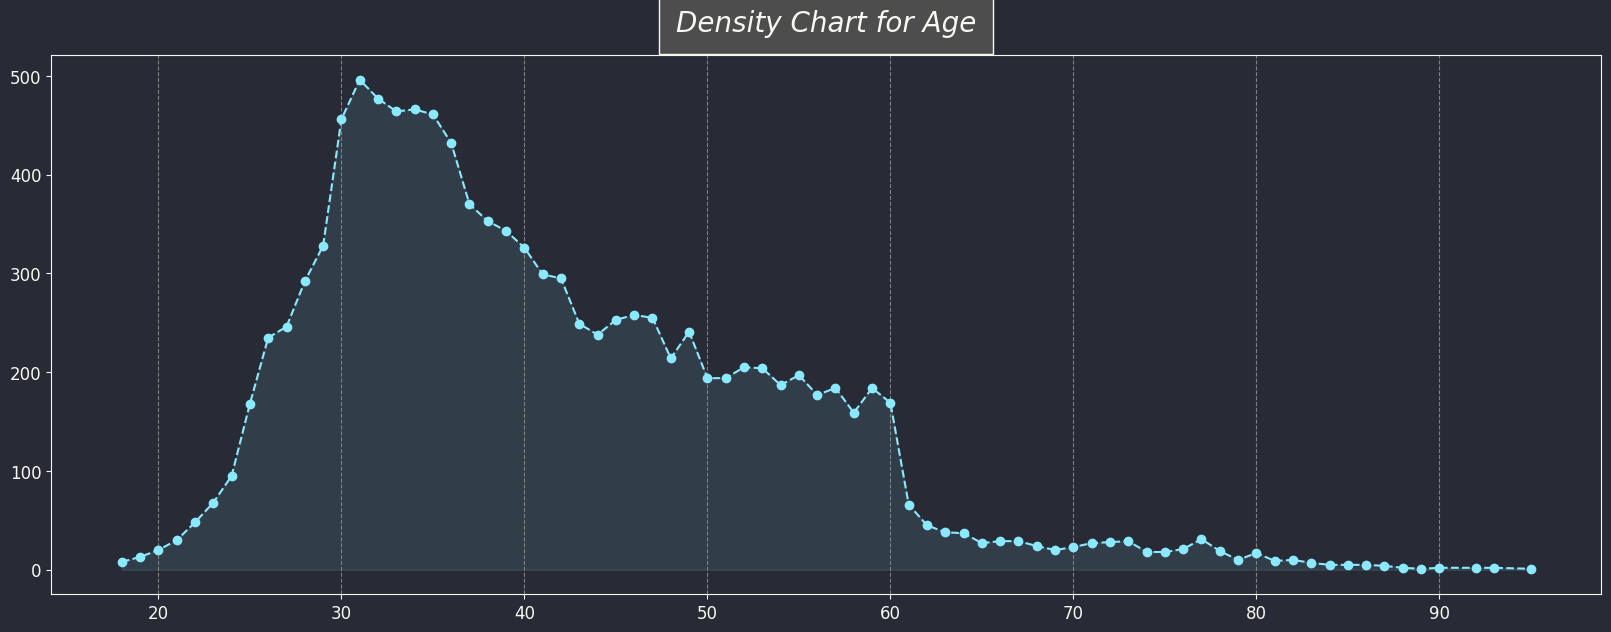

In [403]:
# Area plot
plt.figure(figsize=(20,7))
plt.title('Density Chart for Age',fontsize = 20,fontstyle='italic',bbox={'facecolor':'0.3', 'pad':12},y=1.029)
plt.plot(df_age['age'],df_age['Repeated'],color='#8be9fd',marker="o",linestyle = 'dashed',label="Months")
plt.fill_between(df_age['age'],df_age['Repeated'], 0, color='#8be9fd', alpha=.1)


plt.grid(linestyle="--",axis='x',color='gray')
plt.savefig("Density Chart for Age.png")


In [151]:
df_Age_deposite=df[["age","balance","deposit"]]
df_Age_deposite

,age,balance,deposit
0,59,2343,yes
1,56,45,yes
2,41,1270,yes
3,55,2476,yes
4,54,184,yes
...,...,...,...
11157,33,1,no
11158,39,733,no
11159,32,29,no
11160,43,0,no


In [155]:
def decades(x):
    if x>=0 and x<20:
        return "10s"
    elif x>=20 and x<30:
        return "20s"
    elif x>=30 and x<40:
        return "30s"
    elif x>=40 and x<50:
        return "40s"
    elif x>=50 and x<60:
        return "50s"
    elif x>=60 and x<70:
        return "60s"
    elif x>=70 and x<80:
        return "70s"
    elif x>=80 and x<90:
        return "80s"
    else:
        return "90s"

In [162]:
df_Age_deposite["new_Age"]=df_Age_deposite["age"].apply(lambda x:decades(x))
df_Age_deposite

,age,balance,deposit,new_Age
0,59,2343,yes,50s
1,56,45,yes,50s
2,41,1270,yes,40s
3,55,2476,yes,50s
4,54,184,yes,50s
...,...,...,...,...
11157,33,1,no,30s
11158,39,733,no,30s
11159,32,29,no,30s
11160,43,0,no,40s


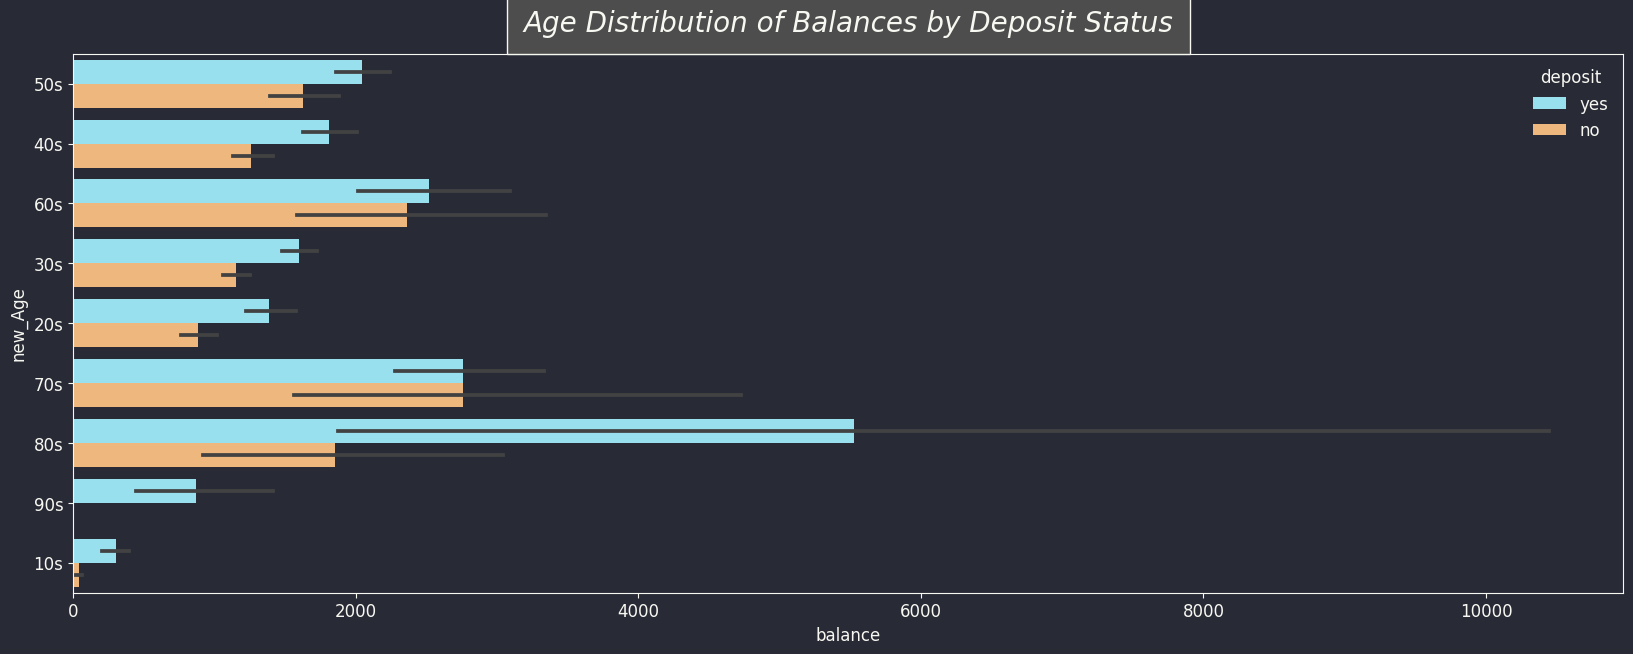

In [404]:
fig = plt.figure(figsize=(20,7))

sns.barplot(x="balance", y="new_Age", hue="deposit",data=df_Age_deposite);
plt.title("Age Distribution of Balances by Deposit Status", fontsize = 20,fontstyle='italic',bbox={'facecolor':'0.3', 'pad':12},y=1.026)
plt.savefig("Age Distribution of Balances by Deposit Status.png")

plt.show()


### - Job

In [372]:
df_job=df.job.value_counts().reset_index().rename(columns = {'job':'values','index':'job'})
df_job

,job,values
0,management,2566
1,blue-collar,1944
2,technician,1823
3,admin.,1334
4,services,923
5,retired,778
6,self-employed,405
7,student,360
8,unemployed,357
9,entrepreneur,328


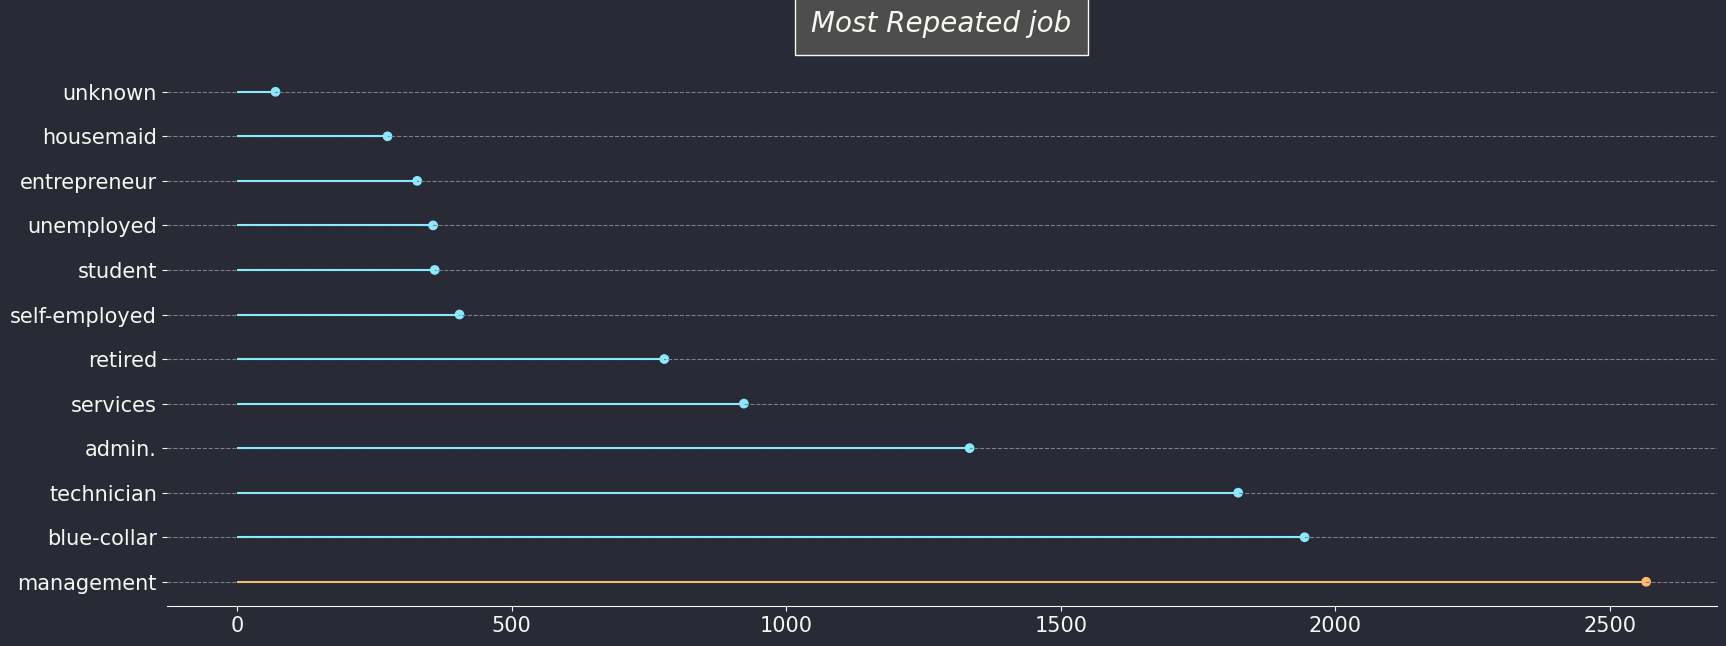

In [405]:
my_range=range(1,len(df_job.index)+1)
plt.figure(figsize = (20,7))

my_color=np.where(df_job ['job']=='management', "#ffb86c","#8be9fd")

plt.hlines(y=my_range, xmin=0, xmax=df_job['values'],color=my_color,alpha=1)
plt.scatter(df_job['values'], my_range,color=my_color, alpha=1)


plt.yticks(my_range, df_job['job'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Most Repeated job",bbox={'facecolor':'0.3', 'pad':12},y=1.05,fontsize=20,fontstyle='italic',loc="center")
plt.grid(linestyle="--",axis='y',color='gray')
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig("Most Repeated job.png")

plt.show()

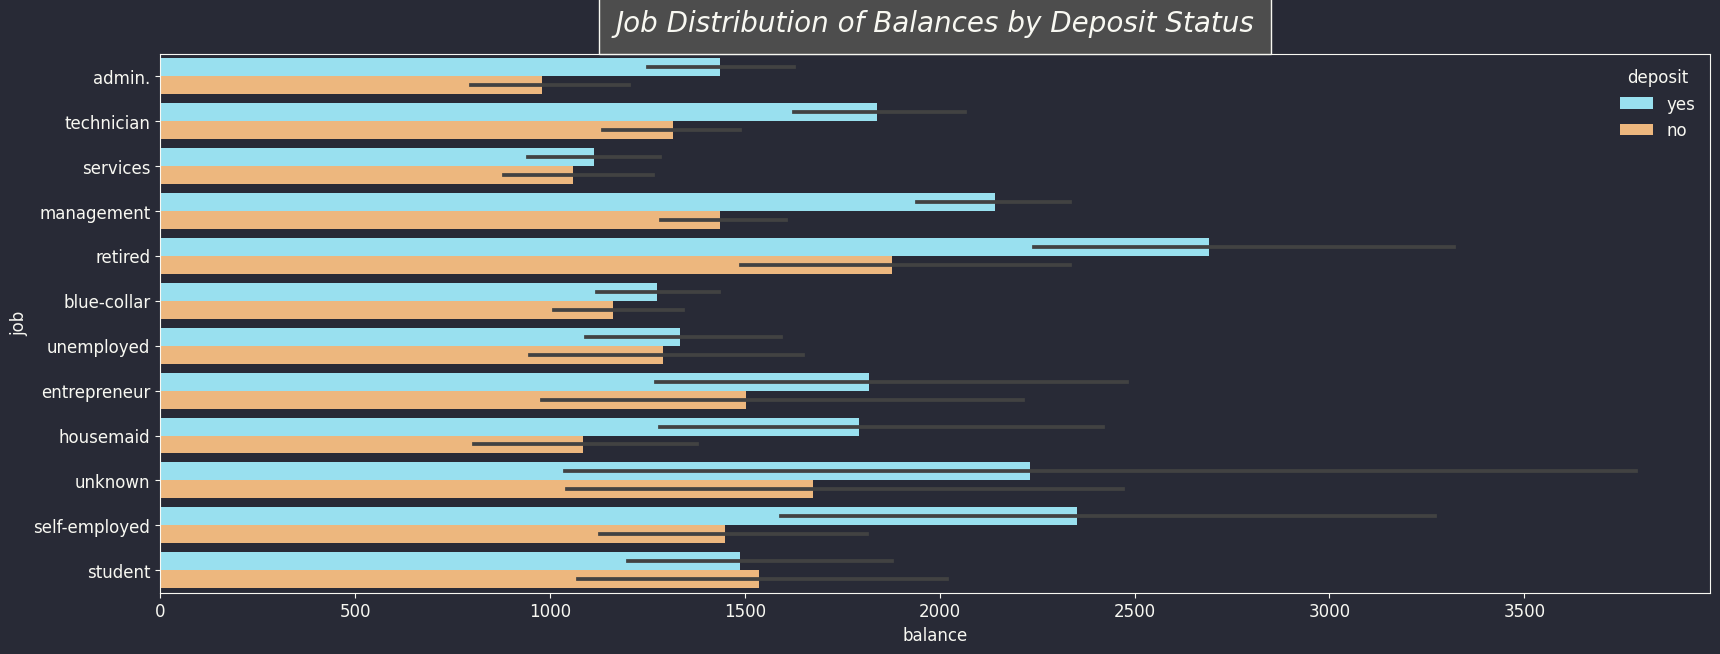

In [421]:
fig = plt.figure(figsize=(20,7))

sns.barplot(x="balance", y="job", hue="deposit",data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize = 20,fontstyle='italic',bbox={'facecolor':'0.3', 'pad':12},y=1.026)
plt.savefig("Job Distribution of Balances by Deposit Status.png")

plt.show()


### - Marital Status

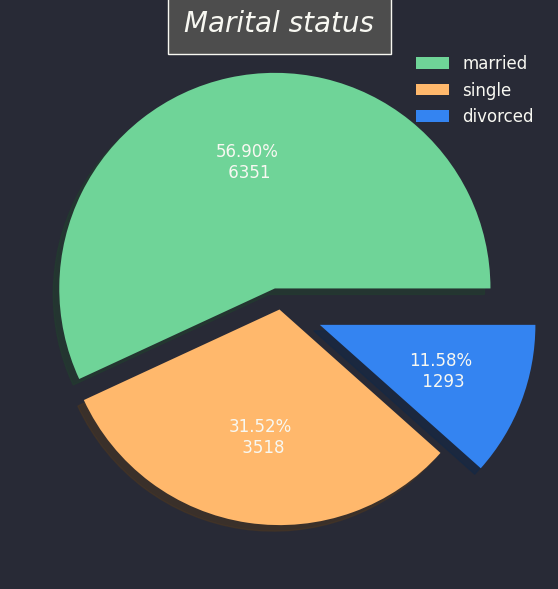

In [407]:
plt.figure(figsize = (20,7))
label = list(df.marital.value_counts().index)
 
data = list(df.marital.value_counts())
explode = (0.1, 0.0, 0.2)

plt.pie(data,explode = explode,shadow=True,autopct=lambda p:f'{p:.2f}%\n {p*sum(data)/100 :.0f}',colors=["#6fd498","#ffb86c","#3484f1"])
plt.title("Marital status",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")
plt.legend( label,loc="upper right")
plt.grid(linestyle="--",axis='y',color='gray')
plt.savefig("Marital status.png")
plt.show()

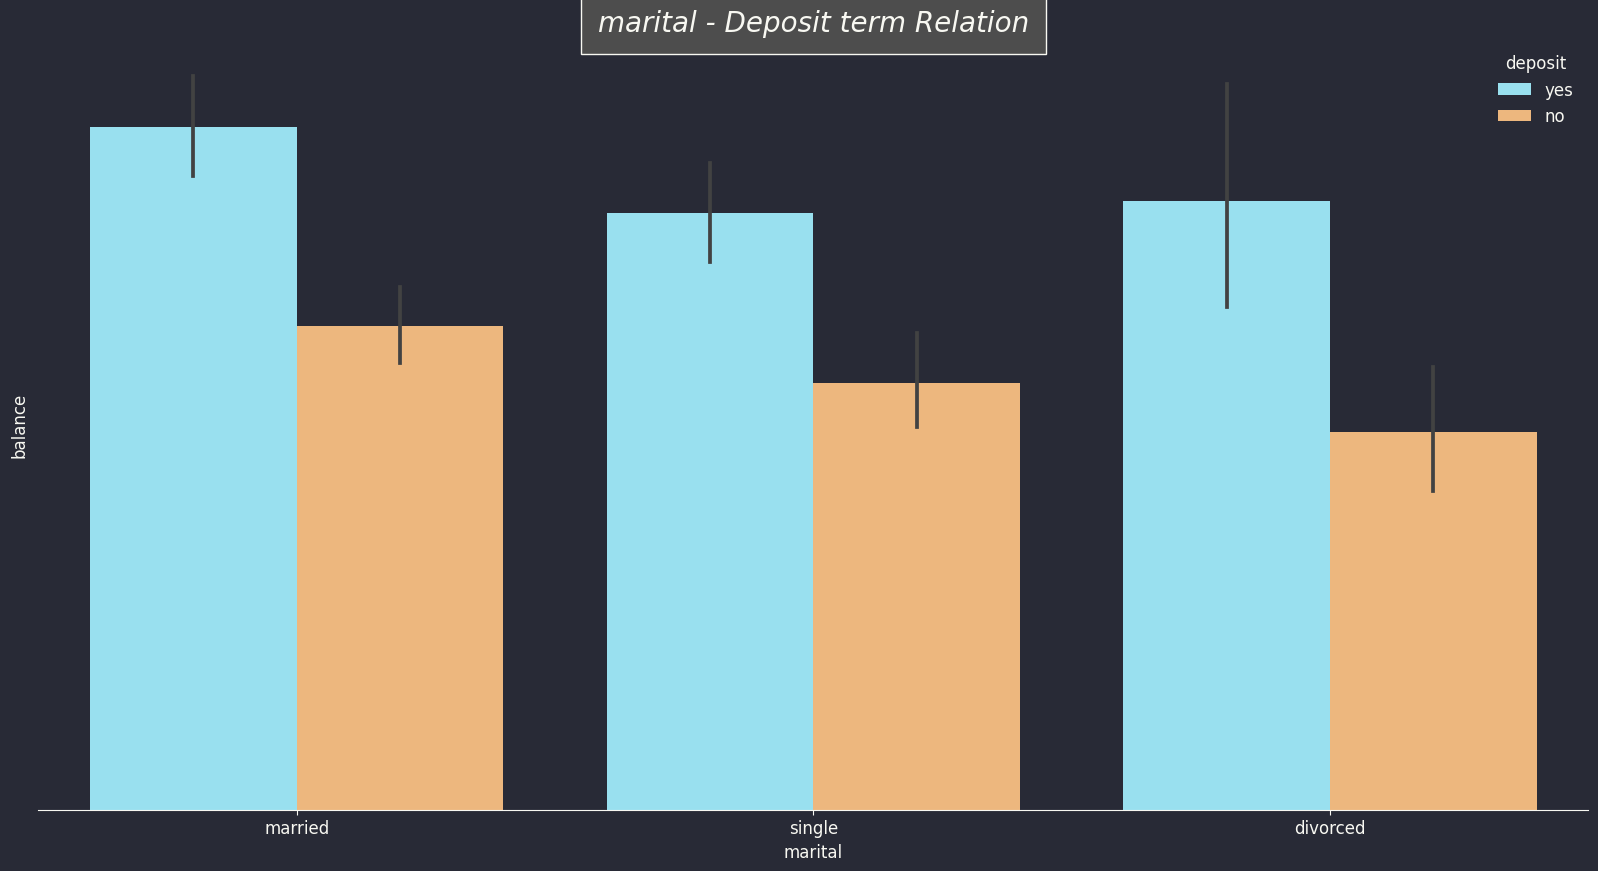

In [430]:
f, ax = plt.subplots(figsize=(20,10))

palette = ["#6fd498","#ffb86c"]

plt.title('marital - Deposit term Relation',fontsize = 20,fontstyle='italic',bbox={'facecolor':'0.3', 'pad':12})

marital_plot=sns.barplot(x="marital", y="balance", hue="deposit", data=df)


sns.despine(top=True, right=True, left=True, bottom=False)
ax.set_yticks([])
ax.set_xticklabels(df["marital"].unique(), rotation=0, rotation_mode="anchor")
plt.savefig("marital - Deposit term Relation.png")

plt.show()

### - Education Status

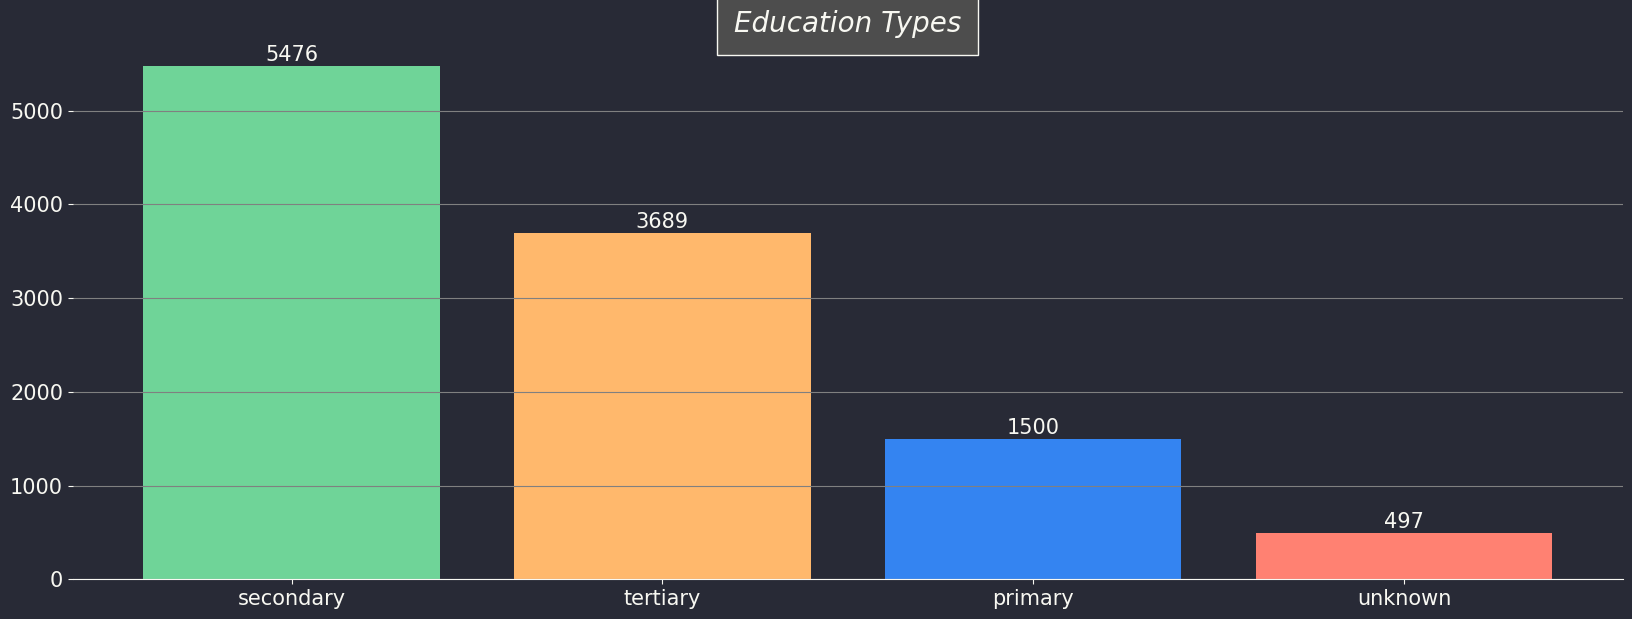

In [408]:
df_education=df.education.value_counts().reset_index().rename(columns = {'education':'values','index':'education'})
plt.figure(figsize = (20,7)) 

ed_plot=plt.bar(x=df_education["education"],height=df_education["values"],color=["#6fd498","#ffb86c","#3484f1",'#ff8172'])

for bar in ed_plot.patches:
    plt.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=15,
                  xytext=(0, 8),
                  textcoords='offset points')
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid(linestyle="-",axis='y',color='gray')
sns.despine(top=True, right=True, left=True, bottom=False)


plt.title("Education Types",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")
plt.savefig("Education Types.png")

plt.show()

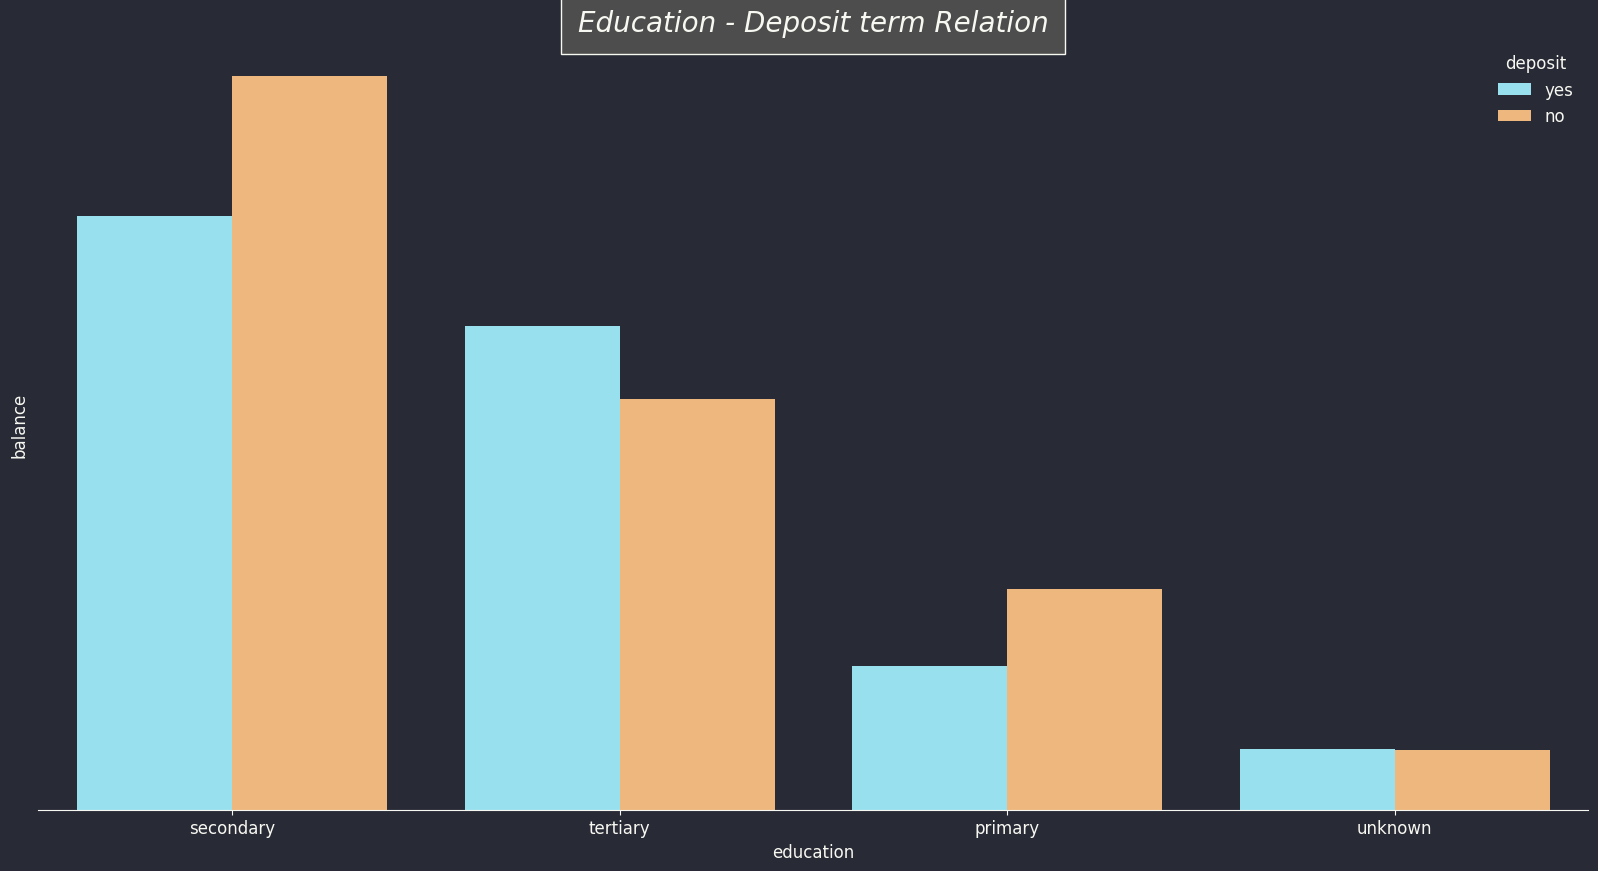

In [409]:
f, ax = plt.subplots(figsize=(20,10))

palette = ["#6fd498","#ffb86c"]

plt.title('Education - Deposit term Relation',fontsize = 20,fontstyle='italic',bbox={'facecolor':'0.3', 'pad':12})

sns.barplot(x="education", y="balance", hue="deposit", data=df,estimator=lambda x: len(x) / len(df) * 100)
sns.despine(top=True, right=True, left=True, bottom=False)
ax.set_yticks([])
ax.set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.savefig("Education - Deposit term Relation.png")

plt.show()

In [164]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,married/secondary
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,married/secondary
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,married/tertiary


Text(0.5, 1.026, 'Median Balance by Educational/Marital Group')

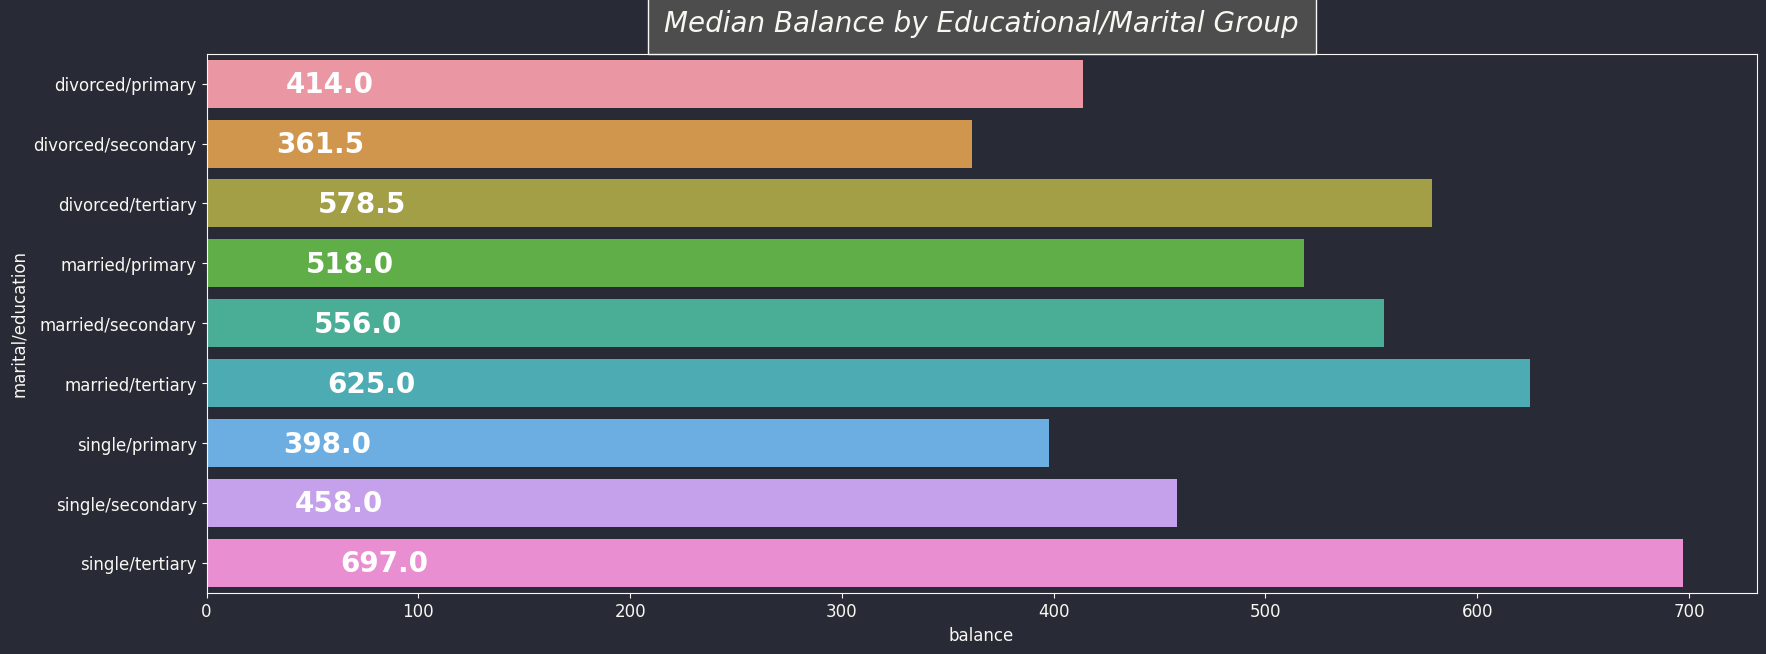

In [383]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(20,7))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total")
for i, v in enumerate(education_groups.balance):
    plt.text(v/11, i+0.15, str(v), color='white', fontweight='bold',fontsize=20)

plt.title('Median Balance by Educational/Marital Group', fontsize = 20,fontstyle='italic',bbox={'facecolor':'0.3', 'pad':12},y=1.026)

### - default

In [171]:
df.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

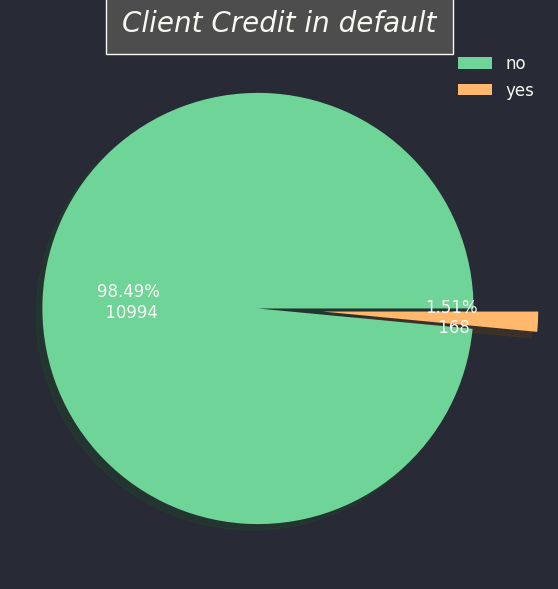

In [411]:
plt.figure(figsize = (20,7))
label = list(df.default.value_counts().index)
 
data = list(df.default.value_counts())
explode = (0.1, 0.2)

plt.pie(data,explode = explode,shadow=True,autopct=lambda p:f'{p:.2f}%\n {p*sum(data)/100 :.0f}',colors=["#6fd498","#ffb86c","#3484f1"])
plt.title("Client Credit in default",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")
plt.legend( label,loc="upper right")
plt.grid(linestyle="--",axis='y',color='gray')
plt.savefig("Client Credit in default.png")

plt.show()

### - Housing & personal Loan

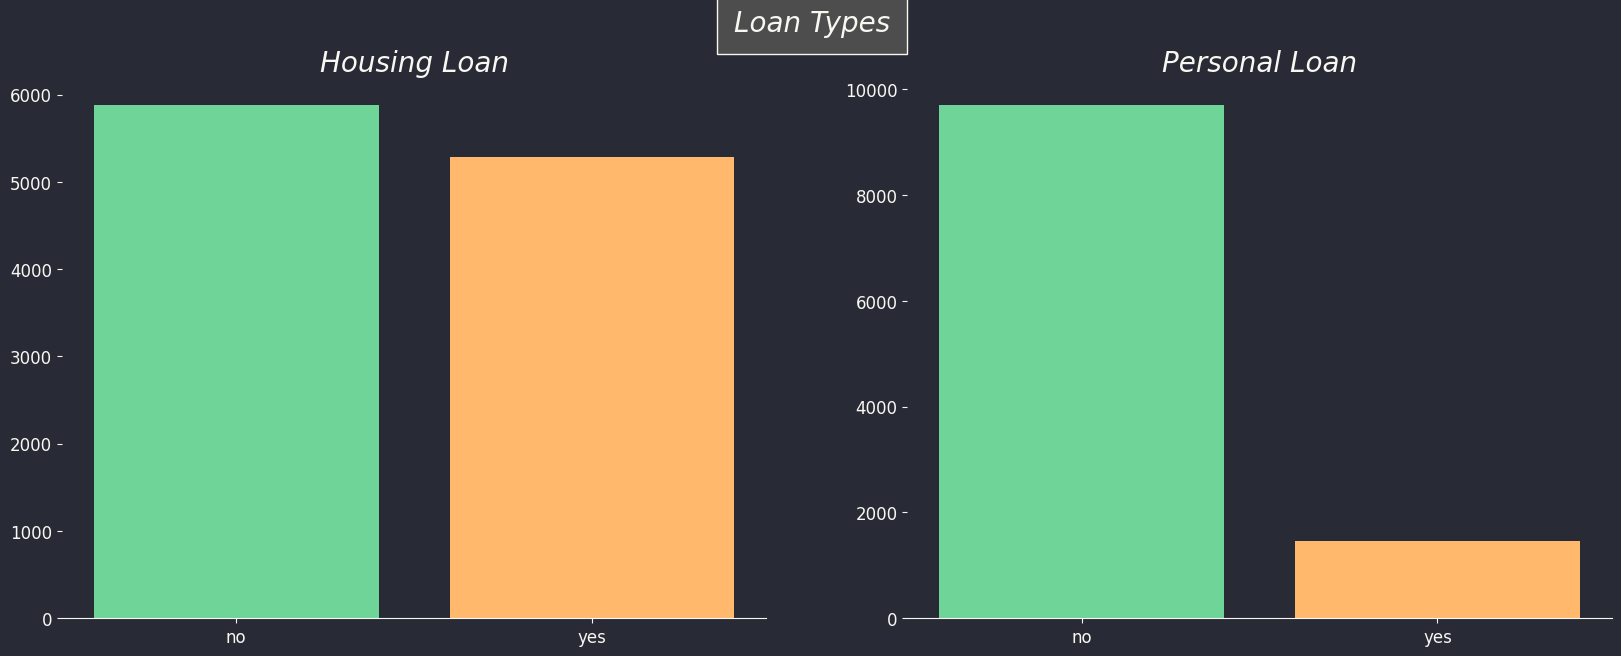

In [412]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20, 7))
fig.suptitle('Loan Types',fontsize = 20,fontstyle='italic',bbox={'facecolor':'0.3', 'pad':12})


ax1.bar(list(df.housing.value_counts().index),list(df.housing.value_counts()),color=["#6fd498","#ffb86c"])
ax1.set_title("Housing Loan",fontsize=20,fontstyle='italic')



ax2.bar(list(df.loan.value_counts().index),list(df.loan.value_counts()),color=["#6fd498","#ffb86c"])
ax2.set_title("Personal Loan",fontsize=20,fontstyle='italic')

sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig("Loan Types.png")

plt.show()

# 2.2 Previous Campaign
### - number of contacts performed before the Current campaign

In [204]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,married/secondary
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,married/secondary
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,married/tertiary


In [217]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
perv_contacts=pd.DataFrame(df.groupby("month")['previous'].sum()).rename(columns = {'previous':'N_Contact'})
perv_contacts.index = pd.to_datetime(perv_contacts.index, format='%b').month
perv_contacts.sort_index(inplace=True)
perv_contacts['months']=new_order
perv_contacts=perv_contacts.reset_index()
perv_contacts2=perv_contacts.drop("month",axis=1)
perv_contacts2

,N_Contact,months
0,444,Jan
1,1012,Feb
2,343,Mar
3,905,Apr
4,2073,May
5,618,Jun
6,550,Jul
7,949,Aug
8,661,Sep
9,589,Oct


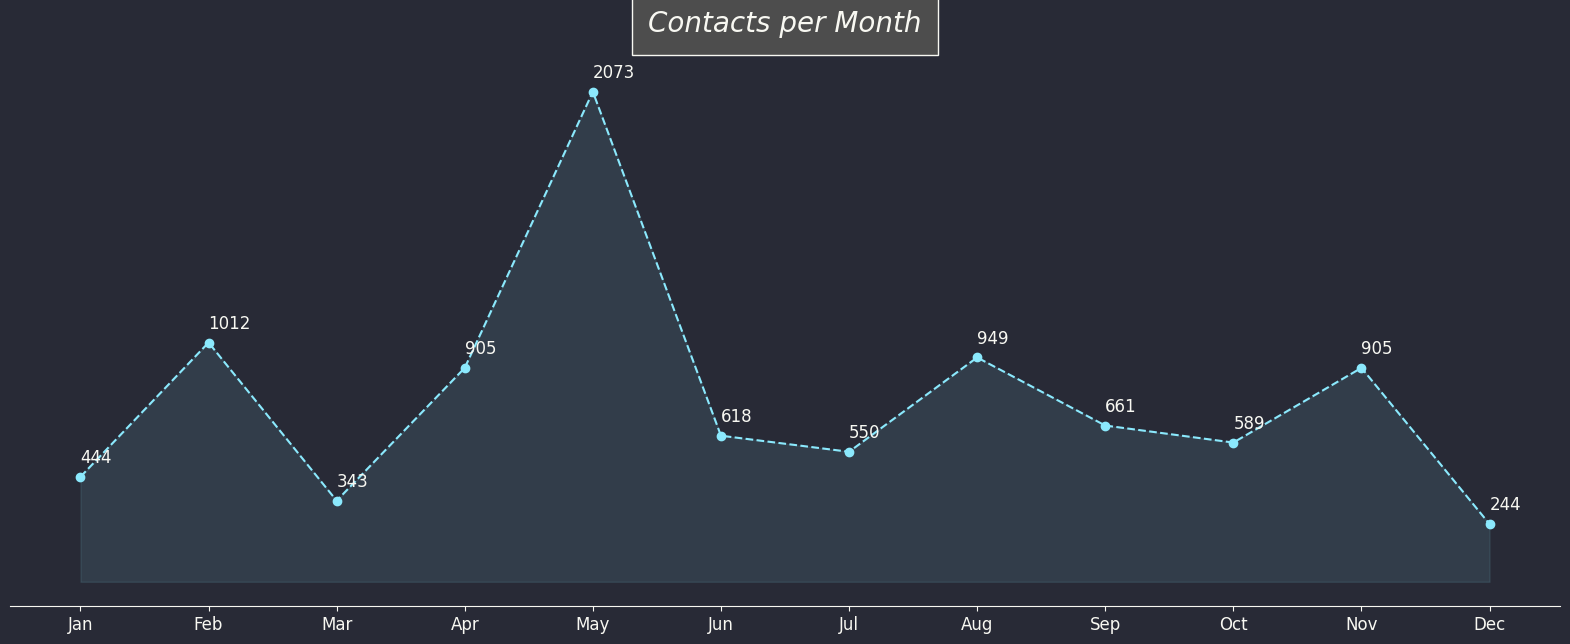

In [413]:
plt.figure(figsize = (20,7))
plt.plot(perv_contacts2['months'],perv_contacts2['N_Contact'],color='#8be9fd',marker="o",linestyle = 'dashed',label="Months")
plt.fill_between(perv_contacts2['months'],perv_contacts2['N_Contact'], 0, color='#8be9fd', alpha=.1)
plt.yticks([])

for x,y in zip(perv_contacts2['months'],perv_contacts2['N_Contact']):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10)) # distance from text to points (x,y)
plt.title("Contacts per Month",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center",y=1.05)

sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig("previous Contacts per Month.png")


### - Outcome of the previous marketing campaign

In [261]:
prev_Outcome=df[['month','poutcome']]
prev_Outcome

,month,poutcome
0,may,unknown
1,may,unknown
2,may,unknown
3,may,unknown
4,may,unknown
...,...,...
11157,apr,unknown
11158,jun,unknown
11159,aug,unknown
11160,may,failure


In [292]:
prev_Outcome2=pd.DataFrame(prev_Outcome.groupby('month')['poutcome'].apply(lambda x:Counter(x))).reset_index().rename(columns = {'level_1':'Outcome',"poutcome":"counts"})
prev_Outcome2.head()

,month,Outcome,counts
0,apr,unknown,599
1,apr,failure,171
2,apr,success,86
3,apr,other,67
4,aug,unknown,1240


In [293]:
prev_Outcome2.month.unique()

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

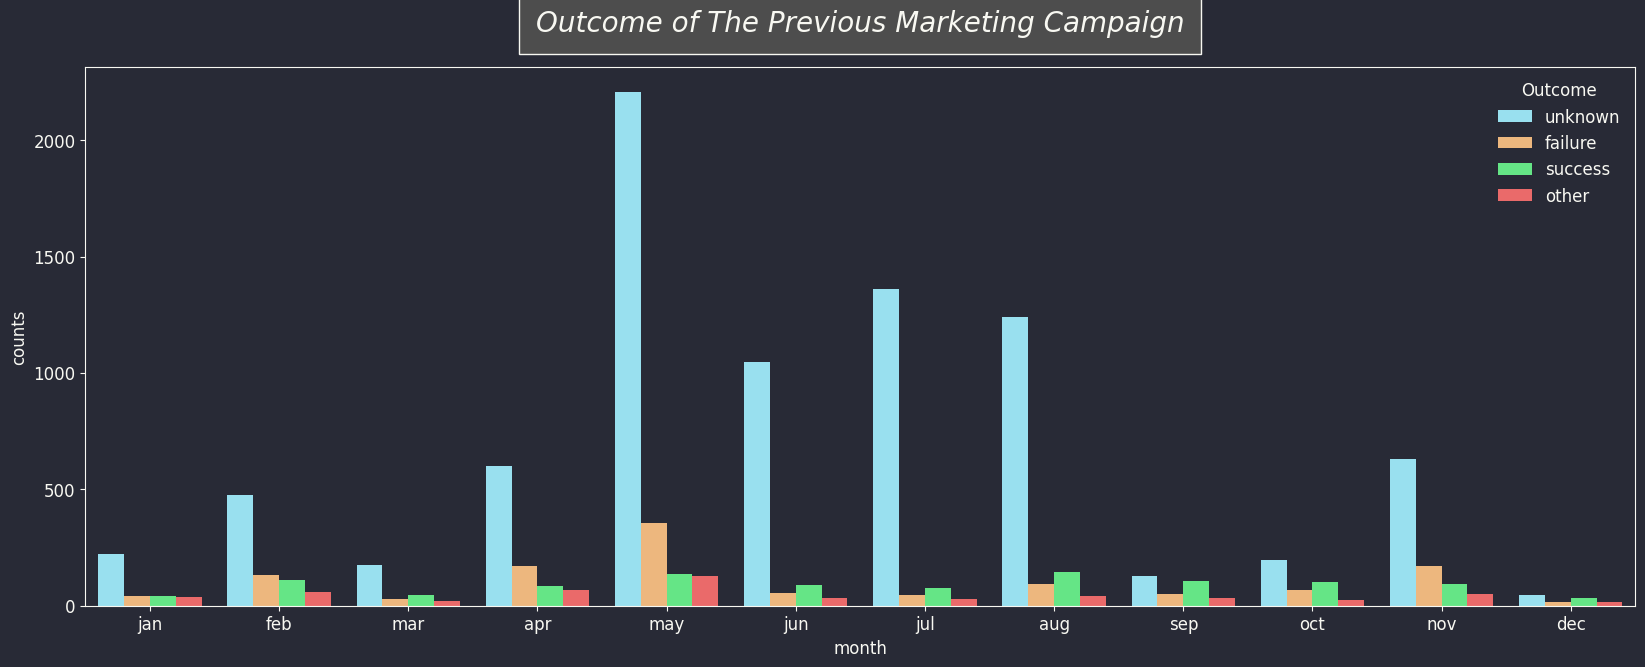

In [414]:
plt.figure(figsize = (20,7))
x_ticks_labels =['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
prev_Outcome2['month'] = pd.Categorical(prev_Outcome2['month'],
                                   categories=x_ticks_labels,
                                   ordered=True)
sns.barplot(x=prev_Outcome2['month'],y=prev_Outcome2["counts"],hue=prev_Outcome2['Outcome'])
plt.title("Outcome of The Previous Marketing Campaign",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center",y=1.05)
plt.savefig("previous outcome per Month.png")


# 2.3 Current Campaign

### - Contact

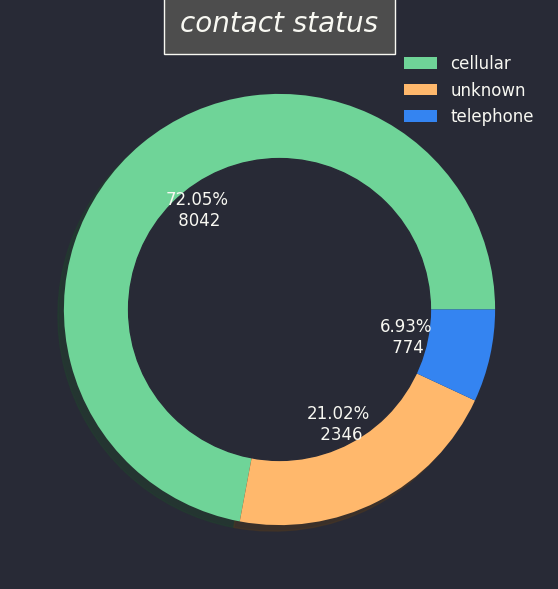

In [415]:
plt.figure(figsize = (20,7))
label = list(df.contact.value_counts().index)
 
data = list(df.contact.value_counts())
plt.rcParams['font.size'] = 12
plt.pie(data,shadow=True,autopct=lambda p:f'{p:.2f}%\n {p*sum(data)/100 :.0f}',colors=["#6fd498","#ffb86c","#3484f1"])
plt.title("contact status",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")
plt.legend( label,loc="upper right")
plt.grid(linestyle="--",axis='y',color='gray')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='#282a36')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("contact status.png")

plt.show()


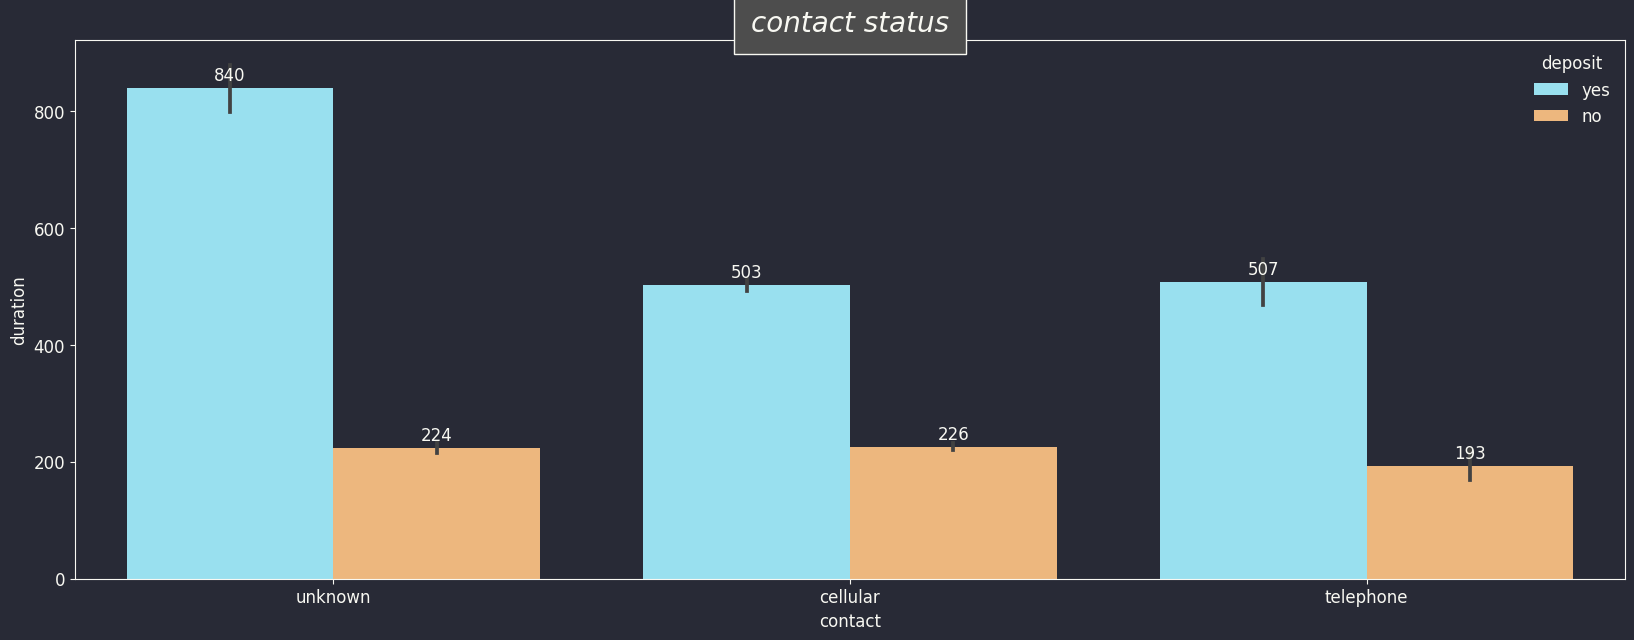

In [416]:
plt.figure(figsize = (20,7))
rate_plot=sns.barplot(x=df['contact'],y=df["duration"],hue=df['deposit'])
plt.title("contact status",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center")
for p in rate_plot.patches:
    rate_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.savefig("contact status.png")


### - Campaign Vs Months

In [315]:
curr_Campaign=df[['month','campaign','deposit']]
curr_Campaign

,month,campaign,deposit
0,may,1,yes
1,may,1,yes
2,may,1,yes
3,may,1,yes
4,may,2,yes
...,...,...,...
11157,apr,1,no
11158,jun,4,no
11159,aug,2,no
11160,may,2,no


In [330]:
curr_Campaign2=pd.DataFrame(curr_Campaign.groupby(['month','deposit'])['campaign'].sum()).reset_index()
curr_Campaign2.head()

,month,deposit,campaign
0,apr,no,655
1,apr,yes,1037
2,aug,no,3490
3,aug,yes,1849
4,dec,no,30


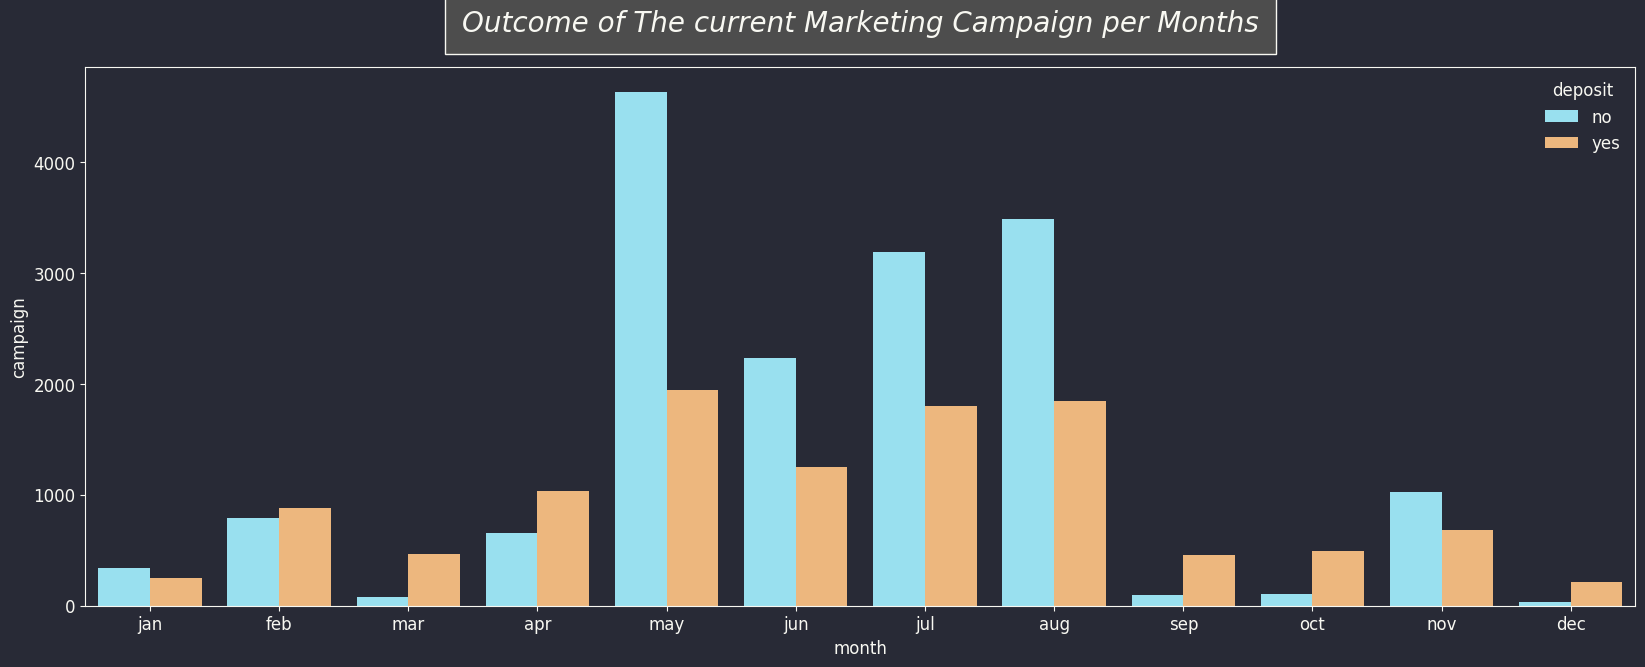

In [417]:
plt.figure(figsize = (20,7))
x_ticks_labels =['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
curr_Campaign2['month'] = pd.Categorical(curr_Campaign2['month'],
                                   categories=x_ticks_labels,
                                   ordered=True)
sns.barplot(x=curr_Campaign2['month'],y=curr_Campaign2["campaign"],hue=curr_Campaign2['deposit'])
plt.title("Outcome of The current Marketing Campaign per Months",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center",y=1.05)
plt.savefig("Outcome current Campaign.png")


### - Campaign Vs Days

In [351]:
new_df=df[['day','campaign','deposit']]
new_df.head()

,day,campaign,deposit
0,5,1,yes
1,5,1,yes
2,5,1,yes
3,5,1,yes
4,5,2,yes


In [355]:
new_df.day.max()

31

In [354]:
curr_Campaign3=pd.DataFrame(new_df.groupby(['day','deposit'])['campaign'].sum()).reset_index()
curr_Campaign3.head()

,day,deposit,campaign
0,1,no,54
1,1,yes,147
2,2,no,358
3,2,yes,320
4,3,no,318


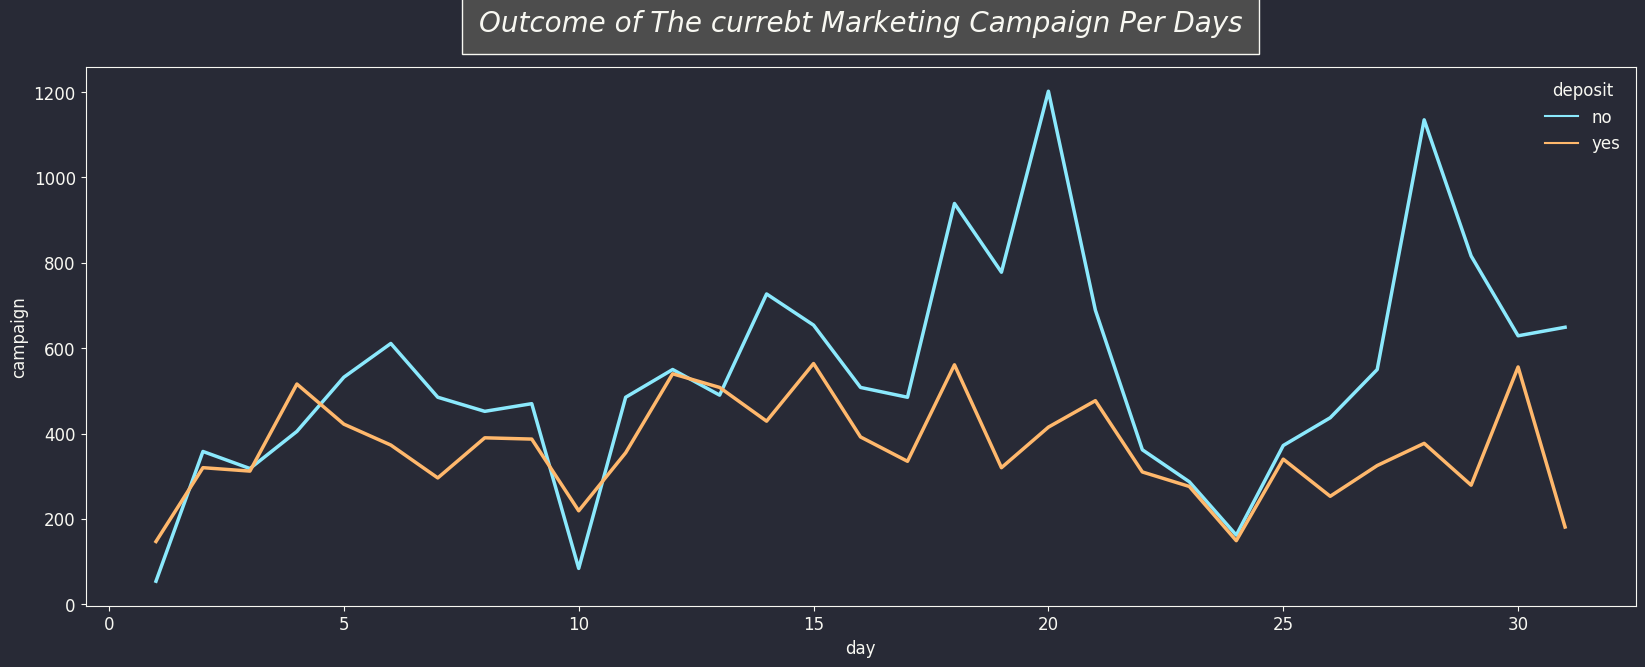

In [418]:
plt.figure(figsize = (20,7))

sns.lineplot(x=curr_Campaign3['day'],y=curr_Campaign3["campaign"],hue=curr_Campaign3['deposit'],linewidth=2.5)

plt.title("Outcome of The currebt Marketing Campaign Per Days",bbox={'facecolor':'0.3', 'pad':12},fontsize=20,fontstyle='italic',loc="center",y=1.05)
plt.savefig("Outcome current Campaign Per Days .png")
